In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import string
import pandas as pd

In [2]:
mathematics = ['pure', 'applied']

mothers = [
    ['foundations_of_math', 'analysis', 'algebra', 'number_theory', 'combinatorics_graph_theory', 'geometry'], ## pure
    ['probability_statistics', 'computational_mathematics', 'mathematical_physics'] ## applied
]

children = [
    ## pure mathematics
    [
    ['model_theory', 'set_theory', 'category_theory'],
    ['real_analysis', 'complex_analysis', 'harmonic_analysis', 'functional_analysis', 'patial_differential_equations', 'numerical_analysis'],
    ['group_theory',  'representation_theory', 'homological_algebra'],
    ['analytical_number_theory', 'algebraic_number_theory'],
    ['combinatorics', 'graph_theory'],
    ['algebraic_geometry', 'computational_geometry', 'arithmetic_geometry'],
    ['general_topology', 'algebraic_topology', 'differential_topology', 'geometric_topology']
    ],
    ## applied mathematics
    [
    ['probability_theory', 'statistics'],
    ['computer_algebra', 'data_science', 'cryptography', 'mathematical_modeling'],
    ['classical_mechanics','complex_dynamical_systems', 'quantum_theory', 'relativity_quantum_relativistic_theories', 'statistical_mechanics']
    ]
]


In [3]:
## create random opinions

n_mentors = 50 # number of mentors
k_mentors = 5 # number of mentor selections
n_mentees = 100 # number of mentees
k_mentees = 3 # number of mentee selections

mentor_selections = []
for i in range(n_mentors):
    temp_ = []
    for j in range(k_mentors):
        math = np.random.choice(len(mathematics), 1, p = [0.6, 0.4])
        mother = np.random.choice(len(mothers[math[0]]), 1)
        child = np.random.choice(len(children[math[0]][mother[0]]), 1)
        temp_.append((math[0], mother[0], child[0]))
    mentor_selections.append(temp_)
    
mentee_selections = []
for i in range(n_mentees):
    temp_ = []
    for j in range(k_mentees):
        math = np.random.choice(len(mathematics), 1, p = [0.3, 0.7])
        mother = np.random.choice(len(mothers[math[0]]), 1)
        child = np.random.choice(len(children[math[0]][mother[0]]), 1)
        temp_.append((math[0], mother[0], child[0]))
    mentee_selections.append(temp_)

In [4]:
#create preference matrix

mentor_nodes = [e for i,e in enumerate((string.ascii_uppercase+string.ascii_lowercase)[:n_mentors])]
mentee_nodes = [i for i in range(n_mentees)]

edge_list = []
for i,e in enumerate(mentee_selections):
    for opinion in e:
        for j,f in enumerate(mentor_selections):
            if opinion in f:
                edge_list.append((mentor_nodes[j], mentee_nodes[i]))

edge_frequency = []
for i,e in enumerate(edge_list):
    edge_frequency.append(edge_list.count(e))

thresh = 1
thresholded_edges = []
for i,e in enumerate(edge_list):
    if edge_frequency[i] > thresh:
        thresholded_edges.append((e[0],e[1],1))
    
# edge_weights = np.array(edge_frequency)/max(edge_frequency)

# for i,e in enumerate(edge_list):
#     for j in range(1, edge_frequency[i]):
#         edge_list.pop(i)
#         edge_weights.tolist().pop(i)

# edges = []
# for e, w in zip(edge_list, edge_weights):
#     edges.append((e[0],e[1],w))

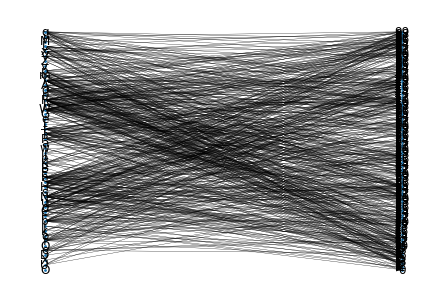

In [5]:
# Initialise graph
G = nx.DiGraph()

G.add_nodes_from(mentor_nodes, bipartite = 0)
G.add_nodes_from(mentee_nodes, bipartite = 1)
# Add edges only between nodes of opposite node sets
G.add_weighted_edges_from(thresholded_edges)


nx.draw(G, pos = nx.drawing.layout.bipartite_layout(G, mentor_nodes), width = 0.3, node_size = 3, with_labels = True) 

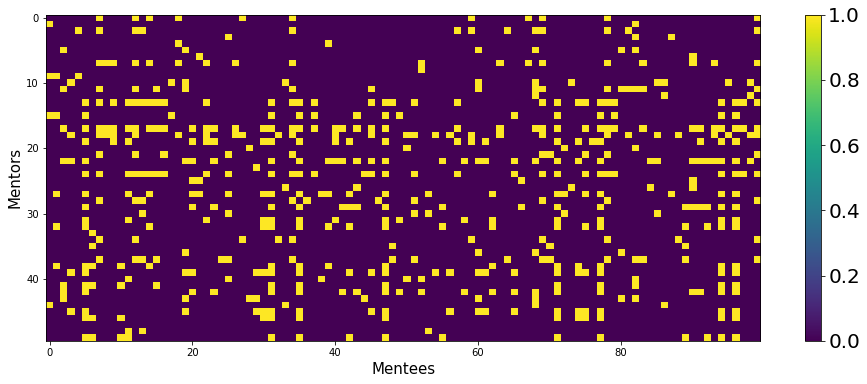

In [6]:
fig,ax= plt.subplots(1,1, figsize = (16,6))
c = ax.imshow(bipartite.biadjacency_matrix(G, mentor_nodes).toarray(), interpolation = 'none', aspect = 'auto',)
ax.set_xlabel('Mentees', fontsize = 15)
ax.set_ylabel('Mentors', fontsize = 15)

cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize = 20) 

In [7]:
matching1 = bipartite.matching.eppstein_matching(G, top_nodes = mentor_nodes)
matching2 = bipartite.matching.hopcroft_karp_matching(G, top_nodes = mentor_nodes)
matching3 = bipartite.matching.maximum_matching(G, top_nodes = mentor_nodes)
#matching4 = bipartite.matching.minimum_weight_full_matching(G, mentor_nodes, "weight")

In [8]:
matching11 = []
matching22 = []
matching33 = []
matching44 = []
for s in mentor_nodes:
    try:
        matching11.append(matching1['%s'%s])
        matching22.append(matching2['%s'%s])
        matching33.append(matching3['%s'%s])
        matching44.append(matching4['%s'%s])
    except:
        pass

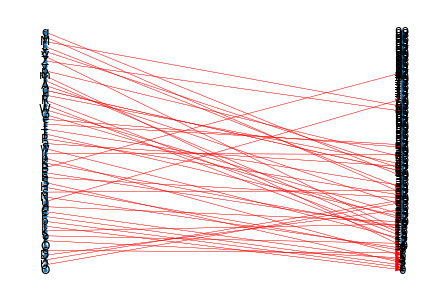

In [9]:
colors = []
edges_drawn = []
for e in thresholded_edges:
    if matching1[e[0]] == e[1]:
        colors.append('red')
        edges_drawn.append((e[0],e[1]))
    
nx.draw(G, pos = nx.drawing.layout.bipartite_layout(G, mentor_nodes),  edgelist = edges_drawn, edge_color = colors, width = 0.3, node_size = 10, with_labels = True) 

In [10]:
dic1 = {}
dic2 = {}


for i, mentor in enumerate(mentor_nodes):
    sl1, sl2 = mentor_selections[i], mentee_selections[matching11[i]]
    dic1['project %d, mentor %s, mentee %s'%(i, mentor, matching11[i])] = [children[choice[0]][choice[1]][choice[2]] for choice in sl1] + ['---']+ [children[choice[0]][choice[1]][choice[2]] for choice in sl2]
    #dic2['project %d, mentee %d'%(i, matching11[i])] =[children[choice[0]][choice[1]][choice[2]] for choice in sl2]

IndexError: list index out of range

In [11]:
dic1

{'project 0, mentor A, mentee 27': ['combinatorics',
  'arithmetic_geometry',
  'data_science',
  'statistics',
  'arithmetic_geometry',
  '---',
  'data_science',
  'quantum_theory',
  'statistics'],
 'project 1, mentor B, mentee 82': ['quantum_theory',
  'computational_geometry',
  'numerical_analysis',
  'model_theory',
  'arithmetic_geometry',
  '---',
  'model_theory',
  'model_theory',
  'statistical_mechanics'],
 'project 2, mentor C, mentee 4': ['analytical_number_theory',
  'cryptography',
  'statistics',
  'harmonic_analysis',
  'statistics',
  '---',
  'quantum_theory',
  'harmonic_analysis',
  'cryptography'],
 'project 3, mentor D, mentee 25': ['model_theory',
  'numerical_analysis',
  'model_theory',
  'category_theory',
  'graph_theory',
  '---',
  'category_theory',
  'graph_theory',
  'algebraic_number_theory'],
 'project 4, mentor E, mentee 18': ['computer_algebra',
  'computer_algebra',
  'combinatorics',
  'computer_algebra',
  'representation_theory',
  '---',
  'c

## Simple MLP